<a href="https://colab.research.google.com/github/darkfrozen158/03MIAR_04_A_2025-2026/blob/main/AG3/Algoritmo_Genetico_para_el_TSP_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmo Genetico para el TSP**



Nombre: CRISTIAN LEONARDO CHAVEZ TRELLES

Github: https://github.com/darkfrozen158/03MIAR_04_A_2025-2026

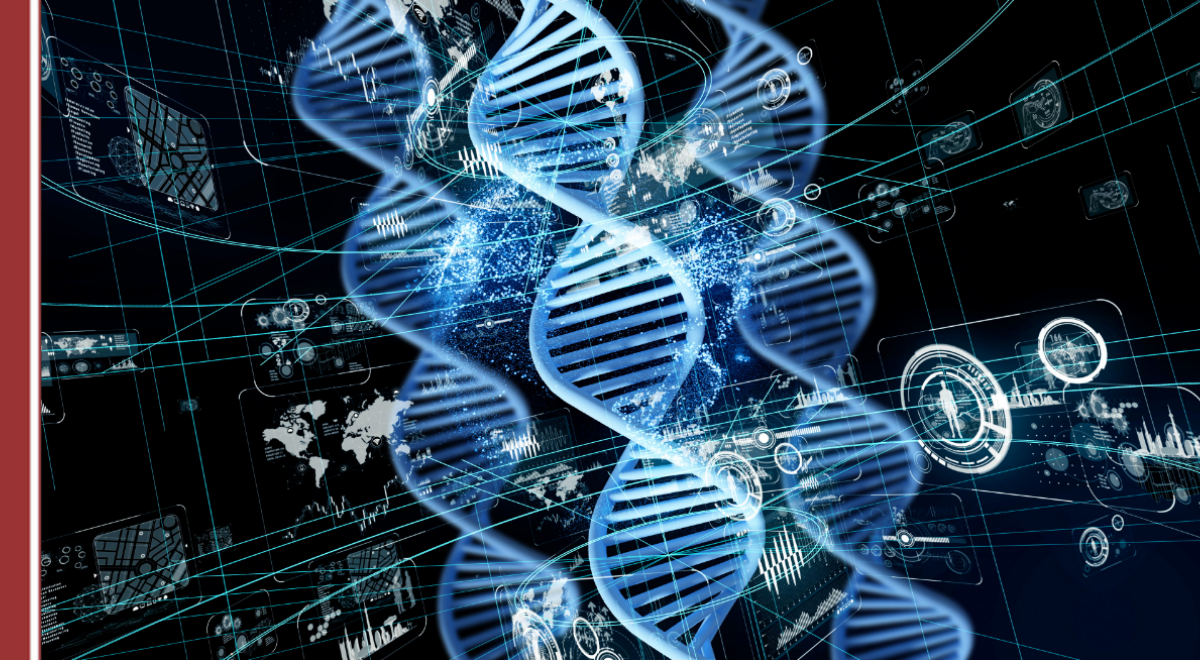

#Instalación de librerias

In [ ]:
!pip install requests
import urllib.request

!pip install tsplib95
import tsplib95

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127

In [ ]:
import random   #Libreria para generar numeros y listas aleatorias
import copy     #Permite hacer copias de objetos en python: listas, diccionarios,...

#Carga de datos del problema

In [ ]:
#Librerias y carga del problema

#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # https://wwwproxy.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/usage.html
  # https://tsplib95.readthedocs.io/modules.html#module-tsplib95.models

#Matriz de distancias
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Objeto de tsplib95 para nuestro problema problema
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())
print(Aristas)

#Coordenadas(si estan disponibles en el ficher)
problem.get_display(1)

#Distancia
problem.get_weight(1, 2)



[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2,

34

#Funciones de la Actividad Guiada 3

In [ ]:
#Funciones de la Actividad Guiada 3
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:] :
    solucion = solucion + [random.choice(list(set(Nodos) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)


#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

#Funciones Auxiliares

In [ ]:
#Genera una poblacion inicial de soluciones de tamaño N.
# Puede ser válida la solución aleatoria de la AG3: crear_solucion(Nodos)
def generar_poblacion(Nodos,N):
  #

SyntaxError: incomplete input (ipython-input-5-3021230068.py, line 4)

In [ ]:
#Evalua la población y devuelve el mejor individuo
def Evaluar_Poblacion(poblacion, problem):
  #...

In [ ]:
#Funcion de cruce. Recibe una poblacion(lista de soluciones) y devuelve la población ampliada con los hijos.
# Todos los individuos de la población son selecionados para el cruce(si la población es par)
# Podría aplicarse un proceso previo de selección para elegir los individuos que se desea cruzar.
def Cruzar(poblacion,mutacion, problem):
  #...

In [ ]:
#Funcion para generar hijos a partir de 2 padres:
# Se elige el metodo de 1-punto de corte pero es posible usar otros n-puntos, uniforme, dependiendo del problema
def Descendencia(padres, problem,mutacion):
  #...

In [ ]:
#Para el operador de cruce 1-punto los hijos generados no son soluciones(algunos nodos se repiten y otros no están)
def Factibilizar(solucion,problem):
  #...

In [ ]:
#Funcion de mutación. Se eligen dos nodos y se intercambia. Se podrian añadir otros operaradores
# Se hace mutaciones mutacion% de las veces
def Mutar(solucion,mutacion):
  #

In [ ]:
#Funcion de seleccion de la población. Recibe como parametro una poblacion y
# devuelve una poblacion a la que se ha eliminado individuos poco aptos(fitness alto) y para mantener una poblacion estable de N individuos
#Se tiene en cuenta el porcentaje elitismo pasado como parametro
# Para los individuos que no son de la elite podríamos usar una selección de ruleta(proporcional a su fitness)
def Seleccionar(problem,poblacion, N, elitismo):


#Proceso Principal

In [ ]:
#Funcion principal del algoritmo genetico
#######################################################3
def algoritmo_genetico(problem=problem,N=100,mutacion=.15,elitismo=.1,generaciones=100):
  # problem = datos del problema
  # N = Tamaño de la población
  # mutacion = probabilidad de una mutación
  # elitismo = porcion de la mejor poblacion a mantener
  # generaciones = nº de generaciones a generar para finalizar

  #Genera la poblacion inicial
  Nodos = list(problem.get_nodes())
  poblacion = generar_poblacion(Nodos,N)

  #Inicializamos valores para la mejor solucion
  (mejor_solucion, mejor_distancia) = Evaluar_Poblacion(poblacion, problem)


  #Condicion de parada
  parar = False
  n=0
  #Inciamos el cliclo de generaciones
  while(parar == False) :

    #Cruce de la poblacion(incluye mutación)
    poblacion = Cruzar(poblacion, mutacion, problem)

    #Seleccionamos la población
    poblacion = Seleccionar(problem,poblacion, N, elitismo)

    #Evaluamos la nueva población
    (mejor_solucion, mejor_distancia) = Evaluar_Poblacion(poblacion, problem)

    print("Generacion #", n, "\nLa mejor solución es:" , mejor_solucion, "\ncon distancia " , mejor_distancia, "\n")

    #Numero de generaciones. Criterio de parada
    if n==generaciones:
      parar = True
    n +=1

  return mejor_solucion


sol = algoritmo_genetico(problem=problem,N=500,mutacion=.3,elitismo=.40,generaciones=250)

NameError: name 'generar_poblacion' is not defined